In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [3]:
#only european countries, excluding spain and portugal
df = read_merged().reset_index()

#all countries
# df = read_merged().reset_index

In [4]:
df.pivot(index="date", columns="country", values="inflation")

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# PCA VAR

In [5]:
from seminartools.models.pca_var_model import PCAVARModel
model = PCAVARModel(num_pcs=10)
# preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
# preds
model.fit(df)

Text(0.5, 0, 'Principal component')

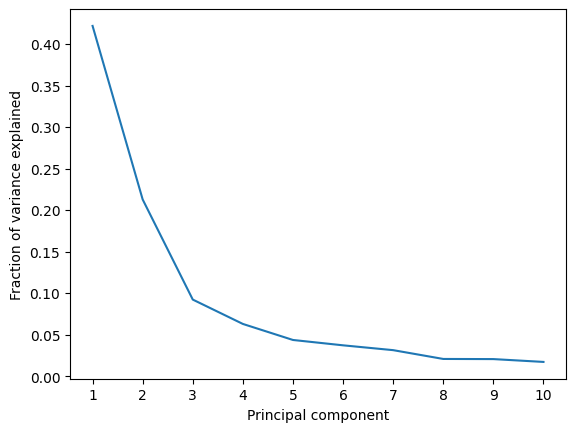

In [12]:
import matplotlib.pyplot as plt
pd.Series(model.all_eigenvalues, index = range(1, len(model.all_eigenvalues)+1)).pipe(lambda x: x / x.sum()).iloc[:10].plot()
plt.ylabel("Fraction of variance explained")
# label every x tick
plt.xticks(range(1, 11))
plt.xlabel("Principal component")

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [ ]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [ ]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [ ]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [ ]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

In [ ]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

In [ ]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

In [ ]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [ ]:
preds.query("inflation > 1")

In [ ]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

In [ ]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

In [ ]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

# Get scores

In [17]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel

muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

I0000 00:00:1713117485.533072 2997006 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [18]:
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        # ("4qa", lambda: FourQuarterAverageModel()),
        #  #("pca_var", lambda: PCAVARModel()),
        # ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        # (
        #     "arx",
        #     lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        # ),
        ("pca_var_2", lambda: PCAVARModel(num_pcs = 2)),
        ("pca_var_3", lambda: PCAVARModel()),
        ("pca_var_4", lambda: PCAVARModel(num_pcs = 4)),
        ("pca_var_5", lambda: PCAVARModel(num_pcs = 5)),
        ("pca_var_6", lambda: PCAVARModel(num_pcs = 6)),
        # ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        # (
        #     "armax",
        #     lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        # ),
        # (
        #     "uc_sv",
        #     lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        # ),
        # (
        #     "uc_sv_ss",
        #     lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        # ),
        # ("random_effects", lambda: RandomEffectsModel()),
        # (
        #     "random_effects_x",
        #     lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        # ),
        # ("distance", lambda: DistanceModel()),
        # ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        # ("mucsvss", lambda: muc_model),
       
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic,p-value
pca_var_2,0.000047,0.004897,-0.108391,0.003711,0.310981,0.021285,56.774843,7.001103029424241e-24
pca_var_3,0.000053,0.005208,-0.241460,0.004063,0.222178,0.019070,113.807186,1.468225142811412e-44
pca_var_4,0.000060,0.005404,-0.392580,0.004118,0.188125,0.021680,181.444289,1.9683003827711393e-66
pca_var_6,0.000091,0.006541,-1.135488,0.004578,0.120013,0.019576,504.826824,1.3535309900344059e-145
pca_var_5,0.001565,0.016776,-35.524312,0.004910,0.000942,0.000032,15222.661011,0.0


In [19]:
# format r2 column to 2 
format_stats = stats.copy()
format_stats['p-value'] =format_stats['p-value'].astype(float)
round_cols = ["r2", "mz_intercept", "mz_slope", "mz_r2", "mz_wald_test_statistic", "p-value"]
for col in round_cols:
    format_stats[col] = format_stats[col].apply(lambda x: round(x, 3))

format_stats['mz_wald_test_statistic'] = format_stats['mz_wald_test_statistic'].astype(str) + '(' + format_stats['p-value'].astype(str) + ')'
format_stats.drop(columns = ['p-value'], inplace = True)
format_stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic
pca_var_2,0.000047,0.004897,-0.108,0.004,0.311,0.021,56.775(0.0)
pca_var_3,0.000053,0.005208,-0.241,0.004,0.222,0.019,113.807(0.0)
pca_var_4,0.000060,0.005404,-0.393,0.004,0.188,0.022,181.444(0.0)
pca_var_6,0.000091,0.006541,-1.135,0.005,0.120,0.020,504.827(0.0)
pca_var_5,0.001565,0.016776,-35.524,0.005,0.001,0.000,15222.661(0.0)


In [20]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    format_stats.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023",
        label="tab:model_eval",
        float_format="%.4f",
    )
)

\begin{table}
\caption{MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023}
\label{tab:model_eval}
\begin{tabular}{lrrrrrrl}
\toprule
 & mse & mae & r2 & mz\_intercept & mz\_slope & mz\_r2 & mz\_wald\_test\_statistic \\
\midrule
pca\_var\_2 & 0.0000 & 0.0049 & -0.1080 & 0.0040 & 0.3110 & 0.0210 & 56.775(0.0) \\
pca\_var\_3 & 0.0001 & 0.0052 & -0.2410 & 0.0040 & 0.2220 & 0.0190 & 113.807(0.0) \\
pca\_var\_4 & 0.0001 & 0.0054 & -0.3930 & 0.0040 & 0.1880 & 0.0220 & 181.444(0.0) \\
pca\_var\_6 & 0.0001 & 0.0065 & -1.1350 & 0.0050 & 0.1200 & 0.0200 & 504.827(0.0) \\
pca\_var\_5 & 0.0016 & 0.0168 & -35.5240 & 0.0050 & 0.0010 & 0.0000 & 15222.661(0.0) \\
\bottomrule
\end{tabular}
\end{table}

